In [273]:
import pandas as pd
from scipy.io import wavfile
from egg_io import *
from fpca_preprocess import *
import matplotlib.pyplot as plt
all_data = pd.read_csv("voiceSauce.csv")
TIMEPOINT = 5

In [274]:
savedRow = random_test_file(all_data)
savedRow

Found file after 1 attempts.


speaker_id             Luchun_M5
speaker_number                 5
speaker_sex                    M
language                  Luchun
language_variety             NaN
                        ...     
SQ2_SQ1                    1.633
SQ4_SQ3                    4.149
ratio                      0.394
LPhon               Luchun-Tense
SQ                      0.393589
Name: 4242, Length: 80, dtype: object

In [275]:
samplerate, data = wavfile.read(filepath(savedRow))
startSample, endSample = sampleEndpoints(savedRow.segment_start, savedRow.segment_end, samplerate, timepoint = TIMEPOINT)
egg = data[startSample:endSample]

/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_71340/2311534566.py:1: WavFileWarning: Reached EOF prematurely; finished at 32992 bytes, expected 65904 bytes from header.
  samplerate, data = wavfile.read(filepath(savedRow))


In [276]:
peaks = pitchmark(egg, samplerate, savedRow.strF0)
threshold = find_threshold(egg, peaks)

<function matplotlib.pyplot.show(close=None, block=None)>

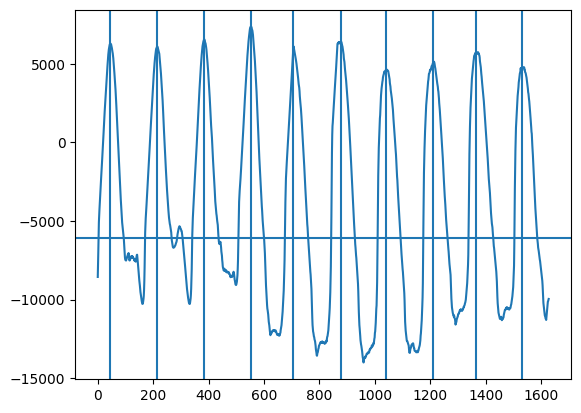

In [277]:
plt.plot(egg)
for peak in peaks:
    plt.axvline(peak)
plt.axhline(threshold)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

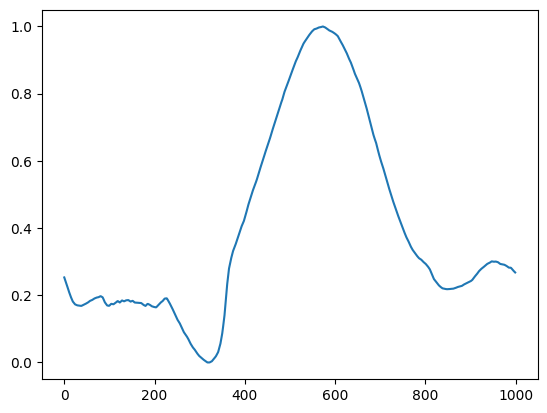

In [ ]:
clipped_egg = clip_egg(egg, threshold, peaks[0])
# TODO: we're getting list index out of range here, in low-F0 cases. look into that if it happens a bunch!
# TODO: also, a lot of the gujarati data is reeeally choppy, i'd look into ways of making this algorithm more robust!
# ^ further, sometimes even in other languages the threshold is too low. raising it would come at the cost of research backing, but might give us more pages!!!
final = normalize_egg(clipped_egg)

plt.plot(final)
plt.show